In [1]:
# Librería para manipulación y análisis de datos
import pandas as pd

In [2]:
# Descargar archivo preprocesado
!wget http://108.62.123.70/GarmentProd/new_number_garments_worker_productivity.csv

--2021-06-28 21:47:45--  http://108.62.123.70/GarmentProd/new_number_garments_worker_productivity.csv
Connecting to 108.62.123.70:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73094 (71K) [text/csv]
Saving to: ‘new_number_garments_worker_productivity.csv.3’

new_number_garments 100%[===================>]  71.38K  --.-KB/s    in 0.006s  

2021-06-28 21:47:45 (11.9 MB/s) - ‘new_number_garments_worker_productivity.csv.3’ saved [73094/73094]



In [3]:
%ls

new_number_garments_worker_productivity.csv
new_number_garments_worker_productivity.csv.1
new_number_garments_worker_productivity.csv.2
new_number_garments_worker_productivity.csv.3
sample_data/


In [4]:
#Lectura del grupo de datos CSV
file_name = "new_number_garments_worker_productivity.csv"

#El método "read_csv" nos permite leer un CSV
dataset = pd.read_csv(file_name)

In [5]:
print(dataset.head())

   date  quarter  ...  no_of_workers  actual_productivity
0    56        1  ...           59.0             0.940725
1    56        1  ...            8.0             0.886500
2    56        1  ...           30.5             0.800570
3    56        1  ...           30.5             0.800570
4    56        1  ...           56.0             0.800382

[5 rows x 15 columns]


In [6]:
print(dataset.shape)

(1197, 15)


In [7]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   int64  
 1   quarter                1197 non-null   int64  
 2   department             1197 non-null   int64  
 3   day                    1197 non-null   int64  
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    1197 non-null   float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

In [8]:
print(dataset.describe())

              date      quarter  ...  no_of_workers  actual_productivity
count  1197.000000  1197.000000  ...    1197.000000          1197.000000
mean     28.917293     2.020050  ...      34.609858             0.735091
std      17.098789     1.557568  ...      22.197687             0.174488
min       0.000000     0.000000  ...       2.000000             0.233705
25%      14.000000     1.000000  ...       9.000000             0.650307
50%      29.000000     1.000000  ...      34.000000             0.773333
75%      44.000000     4.000000  ...      57.000000             0.850253
max      58.000000     4.000000  ...      89.000000             1.120437

[8 rows x 15 columns]


#Bagging regressor.

Un regresor de Bagging es un metaestimador de conjunto que ajusta los regresores base cada uno en subconjuntos aleatorios del conjunto de datos original y luego agrega sus predicciones individuales (ya sea por votación o promediando) para formar una predicción final. Un metaestimador de este tipo se puede utilizar típicamente como una forma de reducir la varianza de un estimador de caja negra (por ejemplo, un árbol de decisión), al introducir la aleatorización en su procedimiento de construcción y luego hacer un conjunto a partir de él.

Fuente: Science Kit, scikit-learn, Machine Learning in Python

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingRegressor.html

Fuente: Scikit-Learn - Ensemble Learning : Bootstrap Aggregation(Bagging) & Random Forests
https://coderzcolumn.com/tutorials/machine-learning/scikit-learn-sklearn-ensemble-learning-bagging-and-random-forests

In [9]:
# Cargar librerías como ensemble que contiene Bagging Regressor y Grid Search CV,
# también se carga las regresiones para formas parte de Bagging: KNeighborsRegressor, LinearRegression y LogisticRegression, y otras herramientas
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVR
from sklearn.ensemble import BaggingRegressor
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression

In [10]:
# Dividir variables dependientes de la variable dependiente
X, y = dataset.iloc[:,:-1],dataset.iloc[:,-1]

In [11]:
# Verificar división
print(X)
print(X.shape)
print(y)
print(y.shape)

      date  quarter  department  ...  idle_men  no_of_style_change  no_of_workers
0       56        1           0  ...         0                   0           59.0
1       56        1           2  ...         0                   0            8.0
2       56        1           0  ...         0                   0           30.5
3       56        1           0  ...         0                   0           30.5
4       56        1           0  ...         0                   0           56.0
...    ...      ...         ...  ...       ...                 ...            ...
1192     3        4           1  ...         0                   0            8.0
1193     3        4           1  ...         0                   0            8.0
1194     3        4           1  ...         0                   0            8.0
1195     3        4           1  ...         0                   0           15.0
1196     3        4           1  ...         0                   0            6.0

[1197 rows x 14

Dividiremos nuestro conjunto de datos para usar el 15% para el entrenamiento y dejar el resto para la prueba. 

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=123)

In [13]:
# Se establecen los parámetros como el estimador y el número de estimadores
# base_estimator: objeto, predeterminado = None
# El estimador base para ajustarse a subconjuntos aleatorios del conjunto de datos.
# Si es None, entonces el estimador base es un DecisionTreeRegressor.

#params = {'base_estimator': SVR(),'n_estimators': 100,'random_state': 123}
params = {'base_estimator': None ,'n_estimators': 100,'random_state': 123}

In [14]:
#Se aplican los parámetros a Bagging Regressor
bagg_reg = BaggingRegressor(**params)


In [15]:
# Se hace el ajuste con datos de entrenamiento
bagg_reg.fit(X_train,y_train)

BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=False,
                 max_features=1.0, max_samples=1.0, n_estimators=100,
                 n_jobs=None, oob_score=False, random_state=123, verbose=0,
                 warm_start=False)

In [16]:
# Se hace una predicción con valores de validación
bagg_predict = bagg_reg.predict(X_test)
print(bagg_predict)
print(bagg_predict.shape)
print(y_test)
print(y_test.shape)

[0.72355739 0.88596893 0.68276343 0.68689306 0.74146579 0.68831187
 0.90524197 0.44701914 0.53742    0.67278292 0.9285721  0.76295426
 0.8808961  0.70585461 0.81432896 0.69439506 0.85859339 0.89406626
 0.66699065 0.57509301 0.63772607 0.63232798 0.81181859 0.74765115
 0.85146521 0.84922616 0.7460657  0.85833772 0.5842089  0.5764334
 0.78331175 0.81500274 0.79883704 0.58025606 0.66481146 0.80707885
 0.61742279 0.73381578 0.73063295 0.5719135  0.55378866 0.83707282
 0.90134798 0.76322916 0.69220208 0.6377872  0.80593077 0.90171089
 0.49563043 0.8139584  0.53530067 0.68566232 0.79343683 0.73609588
 0.80490897 0.60848078 0.98791274 0.83174306 0.70189533 0.87904622
 0.80737778 0.87776804 0.43836214 0.57604182 0.80396149 0.68190206
 0.80333034 0.79941529 0.81074395 0.65513037 0.6950195  0.64518698
 0.54134493 0.78794038 0.83492678 0.83011601 0.80461169 0.95447055
 0.80031676 0.80128858 0.78756529 0.68932945 0.8605604  0.7647108
 0.69804867 0.85833919 0.40181152 0.79350984 0.69829157 0.882932

Veamos también el error cuadrático medio en los datos de validación, la raíz del error cuadrático medio en los datos de validación y el puntaje (score) de entrenamiento y validación.

In [17]:
mse = mean_squared_error(y_test, bagg_predict)
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

The mean squared error (MSE) on test set: 0.0164


In [18]:
rmse = np.sqrt(mean_squared_error(y_test, bagg_predict))
print("RMSE: %f" % (rmse))

RMSE: 0.128238


In [19]:
bagg_score_train = bagg_reg.score(X_train, y_train)
print(bagg_score_train)

0.9302272878056884


In [20]:
bagg_score_test = bagg_reg.score(X_test, y_test)
print(bagg_score_test)

0.44620547469650723


El entrenamiento no esta presenta sobreajuste (overfitting) y el puntaje con datos de validación son bajos.

Trace la desviación del entrenamiento. Visualizaremos los resultados. Para hacer eso, primero calcularemos la desviación del conjunto de prueba y luego la graficaremos contra las iteraciones de impulso.

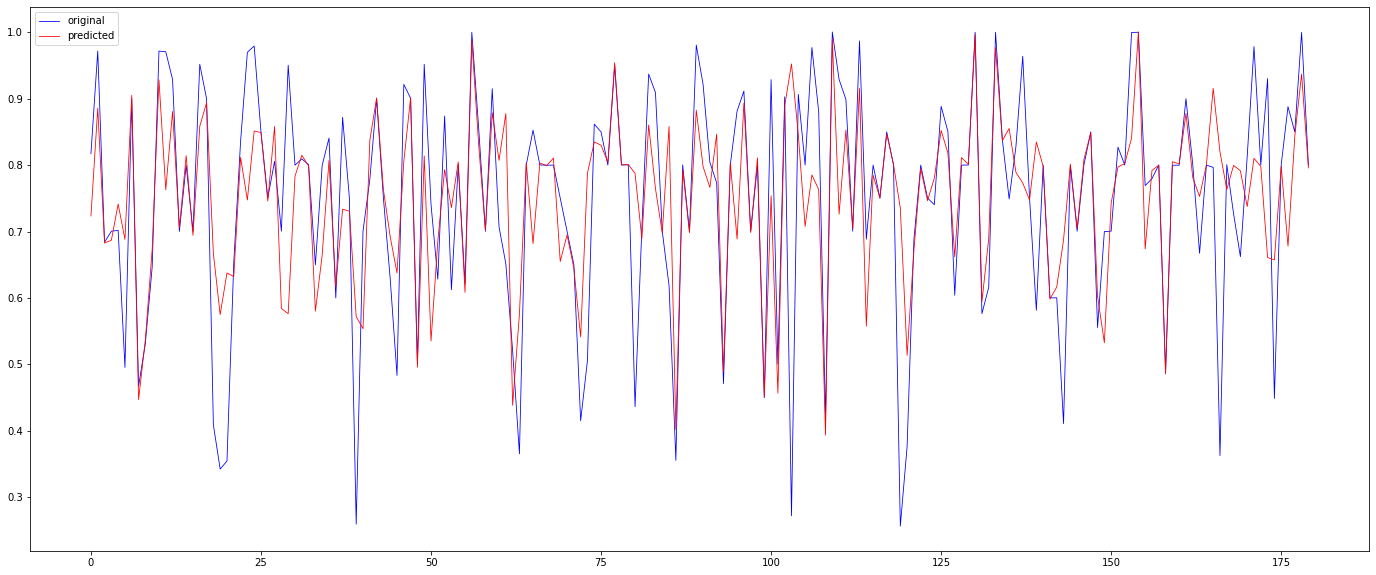

In [21]:
x_ax = range(len(y_test))
plt.figure(figsize=(24,10))
#plt.scatter(x_ax, y_test, s=5, color="blue", label="original")
plt.plot(x_ax, y_test, lw=0.8, color="blue", label="original")
plt.plot(x_ax, bagg_predict, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()

#GridSearchCV.
Es una clase contenedora proporcionada por sklearn que recorre todos los parámetros proporcionados como parámetro params_grid con una serie de pliegues de validación cruzada proporcionados como parámetro cv, evalúa el rendimiento del modelo en todas las combinaciones y almacena todos los resultados en el atributo cv_results_. También almacena el modelo que se desempeña mejor en todos los pliegues de validación cruzada en el atributo best_estimator_ y la mejor puntuación en el atributo best_score_.

El parámetro n_jobs lo proporcionan muchos estimadores. Acepta el número de núcleos que se utilizarán para la paralelización. Si se da el valor de -1, entonces usa todos los núcleos. Utiliza la biblioteca de procesamiento paralelo joblib para ejecutar cosas en paralelo en segundo plano.

Probaremos varios valores para los hiperparámetros mencionados anteriormente para encontrar el mejor estimador para nuestro conjunto de datos haciendo una validación cruzada.

Fuente: Science Kit, scikit-learn, Machine Learning in Python

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [22]:
# Verificar datos de entrenamiento
print(X_train.shape[0])
print(X_train.shape[1])

1017
14


In [23]:
# Establecer parámetros a probar
# Si es None, entonces el estimador base es un DecisionTreeRegressor.
%%time

#n_samples = X_train.shape[0]
#n_features = X_train.shape[0]

params = {'base_estimator': [None, LinearRegression(), LogisticRegression(), KNeighborsRegressor(), SVR()],
          'n_estimators': [50,100,150,200],
          #'max_samples': [0.5,1.0, n_samples//2,],
          #'max_features': [0.5,1.0, n_features//2,],
          'max_samples': [0.25,0.5,1.0],
          'max_features': [0.25,0.5,1.0],
          'bootstrap': [True, False],
          'bootstrap_features': [True, False]}



CPU times: user 77 µs, sys: 14 µs, total: 91 µs
Wall time: 95.8 µs


In [24]:
bagging_regressor_grid = GridSearchCV(BaggingRegressor(random_state=123, n_jobs=-1), param_grid =params, cv=5, n_jobs=-1, verbose=1)
bagging_regressor_grid.fit(X_train, y_train)



Fitting 5 folds for each of 720 candidates, totalling 3600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   11.9s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   56.4s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 1796 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done 2446 tasks      | elapsed:  8.5min
[Parallel(n_jobs=-1)]: Done 3196 tasks      | elapsed: 15.0min
[Parallel(n_jobs=-1)]: Done 3600 out of 3600 | elapsed: 24.7min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=BaggingRegressor(base_estimator=None, bootstrap=True,
                                        bootstrap_features=False,
                                        max_features=1.0, max_samples=1.0,
                                        n_estimators=10, n_jobs=-1,
                                        oob_score=False, random_state=123,
                                        verbose=0, warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'base_estimator': [None,
                                            LinearRegression(copy_X=True,
                                                             fit_intercept=True...
                                            SVR(C=1.0, cache_size=200,
                                                coef0=0.0, degree=3,
                                                epsilon=0.1, gamma='scale',
                                                kernel='rbf', max_it

In [27]:
# Se muestran los mejores puntajes y mejor modelo 
print('Train R^2 Score : %.3f'%bagging_regressor_grid.best_estimator_.score(X_train, y_train))
print('Test R^2 Score : %.3f'%bagging_regressor_grid.best_estimator_.score(X_test, y_test))
print('Best R^2 Score Through Grid Search : %.3f'%bagging_regressor_grid.best_score_)
print('Best Parameters : ',bagging_regressor_grid.best_params_)

Train R^2 Score : 0.918
Test R^2 Score : 0.448
Best R^2 Score Through Grid Search : 0.521
Best Parameters :  {'base_estimator': None, 'bootstrap': True, 'bootstrap_features': True, 'max_features': 1.0, 'max_samples': 1.0, 'n_estimators': 200}


Impresión de los primeros resultados de validación cruzada. GridSearchCV mantiene los resultados de todas las combinaciones de parámetros probadas con todas las divisiones de validación cruzada. Podemos acceder a los resultados de todas las iteraciones como un diccionario llamando al atributo cv_results_ en él.

In [28]:
cross_val_results = pd.DataFrame(bagging_regressor_grid.cv_results_)
print('Number of Various Combinations of Parameters Tried : %d'%len(cross_val_results))

cross_val_results.head() ## Imprimir primeros resultados de la tabla de validación cruzada.

Number of Various Combinations of Parameters Tried : 720


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_base_estimator,param_bootstrap,param_bootstrap_features,param_max_features,param_max_samples,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.186118,0.041390,0.104044,0.000973,None,True,True,0.25,0.25,50,"{'base_estimator': None, 'bootstrap': True, 'b...",0.288491,0.345404,0.354279,0.340966,0.314394,0.328707,0.024105,140
1,0.309376,0.004077,0.107536,0.001843,None,True,True,0.25,0.25,100,"{'base_estimator': None, 'bootstrap': True, 'b...",0.295687,0.332531,0.344338,0.322675,0.307300,0.320506,0.017364,144
2,0.410559,0.003893,0.106444,0.002295,None,True,True,0.25,0.25,150,"{'base_estimator': None, 'bootstrap': True, 'b...",0.289908,0.331818,0.354912,0.313806,0.302420,0.318573,0.022809,146
3,0.511654,0.002084,0.105288,0.001622,None,True,True,0.25,0.25,200,"{'base_estimator': None, 'bootstrap': True, 'b...",0.276267,0.323047,0.347777,0.307895,0.295506,0.310098,0.024289,151
4,0.188733,0.039010,0.103422,0.000506,None,True,True,0.25,0.5,50,"{'base_estimator': None, 'bootstrap': True, 'b...",0.307268,0.363376,0.391968,0.339849,0.324872,0.345466,0.029658,128


# Evaluación del mejor modelo 

In [29]:
# Predecir usando datos de prueba 
bagging_regressor_grid_predict = bagging_regressor_grid.predict(X_test)

Veamos también el error cuadrático medio en los datos de prueba, la raíz del error cuadrático medio en los datos de prueba y el puntaje (score) de entrenamiento y pruebas.

In [30]:
mse = mean_squared_error(y_test, bagging_regressor_grid_predict)
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

The mean squared error (MSE) on test set: 0.0164


In [31]:
rmse = np.sqrt(mean_squared_error(y_test, bagging_regressor_grid_predict))
print("RMSE: %f" % (rmse))

RMSE: 0.128032


In [32]:
reg_score_train = bagging_regressor_grid.score(X_train, y_train)
print(reg_score_train)

0.9178658897937557


In [33]:
reg_score_test = bagging_regressor_grid.score(X_test, y_test)
print(reg_score_test)

0.44798305949364214


El puntaje para datos de entrenamiento no presentan sobreajuste y para datos de prueba mejoró en el tercer decimal.

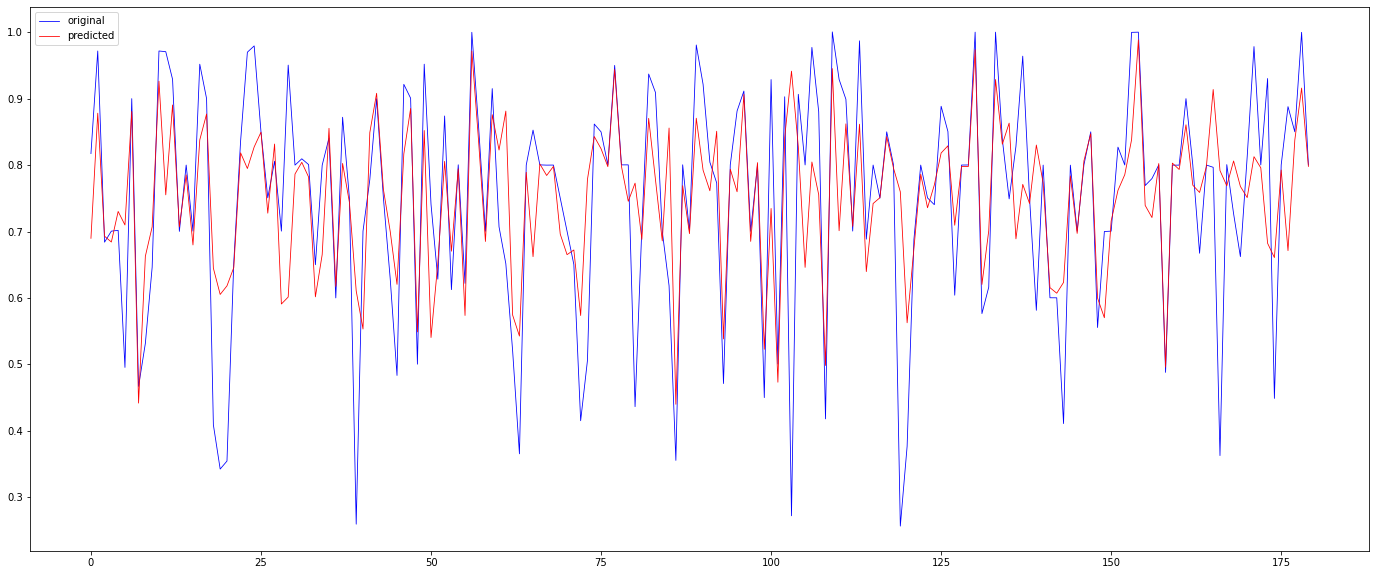

In [34]:
x_ax = range(len(y_test))
plt.figure(figsize=(24,10))
#plt.scatter(x_ax, y_val, s=5, color="blue", label="original")
plt.plot(x_ax, y_test, lw=0.8, color="blue", label="original")
plt.plot(x_ax, bagging_regressor_grid_predict, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()